### load nex files

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

import NexFileReaders

readerNex5 = NexFileReaders.Nex5FileReader()


In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
def plot_spectrogram(values, sampling_rate, ylim, title):
    # Define parameters
    window = 'hann'  # Windowing technique for spectral analysis
    nperseg = int(sampling_rate)  # Length of each segment (1 second)
    noverlap = int(sampling_rate / 2)  # 50% overlap
    nfft = int(2 ** np.ceil(np.log2(nperseg)))  # Number of points in FFT, next power of 2 from segment length
    
    # Generate the spectrogram
    f, t, Sxx = spectrogram(values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap, nfft=nfft, scaling='spectrum')
    mask = f <= ylim
    f = f[mask]
    Sxx = Sxx[mask, :]
    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=parula_map, vmin=-100, vmax=-30)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title(title)
    plt.colorbar(label='Power Spectral Density (dB)')
    plt.ylim(0, ylim)  # Limit frequency up to 300 Hz
    plt.show()

### Load LFP data

In [4]:
dirtolfps = r"F:\EnclosureProjects\inprep\freemat\ephys_tests\240424_mat3_LFPs\hedy_1to300hz\nex5"

try:
    setofnexfiles = [file for file in os.listdir(dirtolfps) if file.endswith(".nex")]
    setofnexfiles = [os.path.join(dirtolfps, file) for file in setofnexfiles]
    print(setofnexfiles)

    #idk why but this works
    reader1 = NexFileReaders.NexFileReader()
    reader2 = NexFileReaders.NexFileReader()
    reader3 = NexFileReaders.NexFileReader()
    reader4 = NexFileReaders.NexFileReader()

    file_0 = reader1.ReadNexFile(setofnexfiles[0])
    file_1 = reader2.ReadNexFile(setofnexfiles[1])
    file_2 = reader3.ReadNexFile(setofnexfiles[2])
    file_3 = reader4.ReadNexFile(setofnexfiles[3])
except: 
    setofnexfiles = [file for file in os.listdir(dirtolfps) if file.endswith(".nex5")]
    setofnexfiles = [os.path.join(dirtolfps, file) for file in setofnexfiles]
    print(setofnexfiles)

    #idk why but this works
    reader1 = NexFileReaders.Nex5FileReader()
    reader2 = NexFileReaders.Nex5FileReader()
    reader3 = NexFileReaders.Nex5FileReader()
    reader4 = NexFileReaders.Nex5FileReader()

    file_0 = reader1.ReadNex5File(setofnexfiles[0])
    file_1 = reader2.ReadNex5File(setofnexfiles[1])
    file_2 = reader3.ReadNex5File(setofnexfiles[2])
    file_3 = reader4.ReadNex5File(setofnexfiles[3])

# Extract LFps from each:
lfps_0 = np.array([data.Values for data in file_0.Continuous])
lfps_1 = np.array([data.Values for data in file_1.Continuous])
lfps_2 = np.array([data.Values for data in file_2.Continuous])
lfps_3 = np.array([data.Values for data in file_3.Continuous])

print(f"The file 0 has {len(file_0.Continuous)} continuous data")
print(f"The file 1 has {len(file_1.Continuous)} continuous data")
print(f"The file 2 has {len(file_2.Continuous)} continuous data")
print(f"The file 3 has {len(file_3.Continuous)} continuous data")
# merge all lfps
lfps = np.concatenate([lfps_0, lfps_1, lfps_2, lfps_3], axis=0)

print(f"Total number of LFP channels: {len(lfps)}")

[]
['F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240424_mat3_LFPs\\hedy_1to300hz\\nex5\\Chan_1-30y_lfp_2_300_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240424_mat3_LFPs\\hedy_1to300hz\\nex5\\Chan_31-60y_lfp_2_300_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240424_mat3_LFPs\\hedy_1to300hz\\nex5\\Chan_61-90y_lfp_2_300_v2.nex5', 'F:\\EnclosureProjects\\inprep\\freemat\\ephys_tests\\240424_mat3_LFPs\\hedy_1to300hz\\nex5\\Chan_91-128y_lfp_2_300_v2.nex5']
The file 0 has 30 continuous data
The file 1 has 30 continuous data
The file 2 has 30 continuous data
The file 3 has 38 continuous data
Total number of LFP channels: 128


C:\Users\Felipe Parodi\AppData\Local\Temp\ipykernel_17416\926290729.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=parula_map, vmin=-100, vmax=-30)


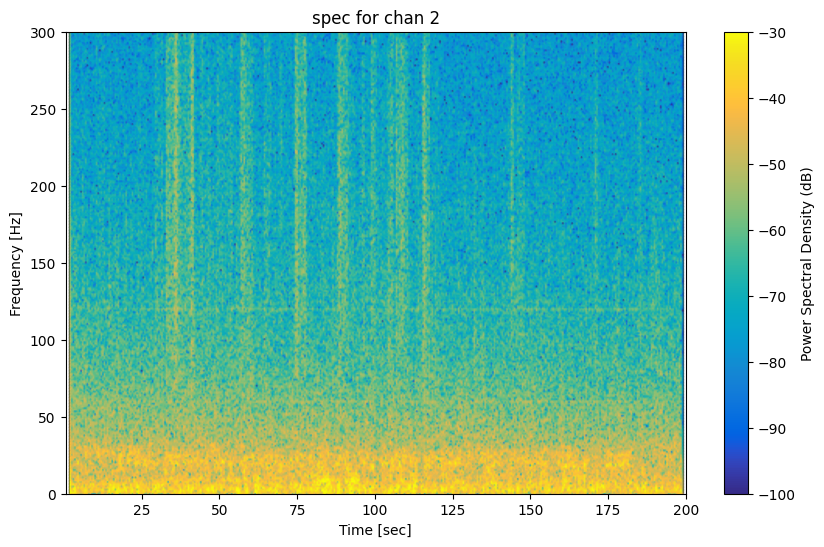

In [5]:
channel = 1
data = lfps[channel]
sampling_rate = 32000
ylim = 300
title = f"spec for chan {channel+1}"
plot_spectrogram(data, sampling_rate,ylim, title)

### Use a notch filter to remove electrical line noise

In [6]:
from scipy.signal import iirnotch, lfilter
from scipy.signal import butter, filtfilt
def remove_60hz_noise_and_harmonics(values, sampling_rate):
    # Define the parameters for the notch filter
    Q = 30  # Quality factor

    # Frequencies to be removed (60 Hz and its harmonics)
    f0s = [60, 120, 180, 240, 300]

    filtered_values = values
    for f0 in f0s:
        w0 = f0 / (sampling_rate / 2)  # Normalized frequency

        # Generate the notch filter
        b, a = iirnotch(w0, Q)

        # Apply the notch filter to the signal
        filtered_values = lfilter(b, a, filtered_values)

    return filtered_values

def filter_all_channels(data, sampling_rate):
    filtered_data = []
    for channel in data:
        filtered_values = remove_60hz_noise_and_harmonics(channel, sampling_rate)
        filtered_data.append(filtered_values)
    return np.array(filtered_data)

def remove_unwanted_frequencies(signal, fs, freqs, bandwidth):
    # Create a bandstop filter for each frequency
    for freq in freqs:
        nyquist = fs / 2.0
        low = (freq - bandwidth/2.0) / nyquist
        high = (freq + bandwidth/2.0) / nyquist
        b, a = butter(2, [low, high], btype='bandstop')
        signal = filtfilt(b, a, signal)
    return signal

# Define the sampling rate and unwanted frequencies
fs = sampling_rate  # replace with your actual sampling rate
unwanted_freqs = [60, 120,240]  # replace with your actual unwanted frequencies

# Define the bandwidth of the stop band
bandwidth = 2  # replace with your desired bandwidth

# Filter the signal
filtered_signal = remove_unwanted_frequencies(lfps, fs, unwanted_freqs, bandwidth)

filtered_lfps = filter_all_channels(lfps, sampling_rate)

C:\Users\Felipe Parodi\AppData\Local\Temp\ipykernel_17416\926290729.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=parula_map, vmin=-100, vmax=-30)


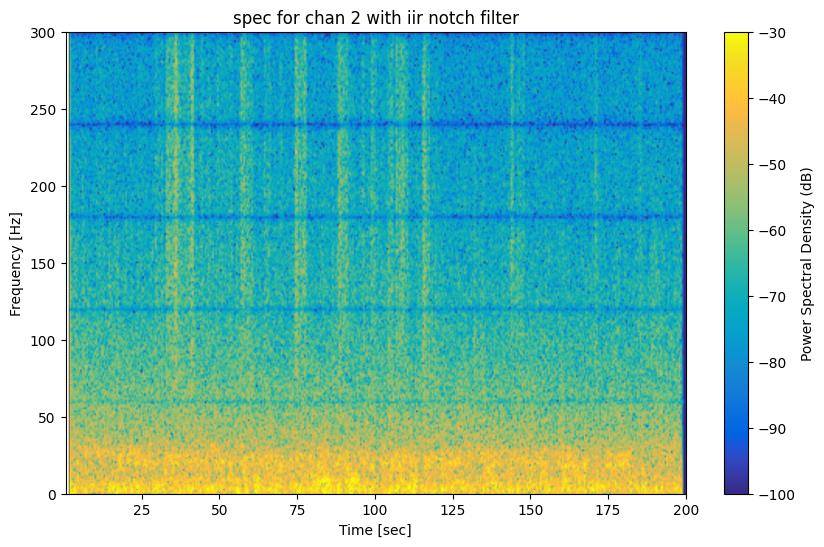

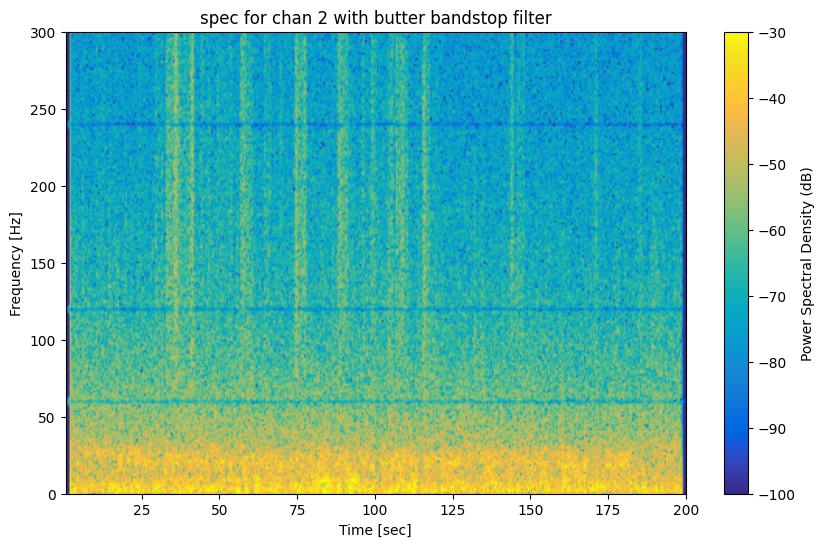

In [7]:
channel = 1
data = filtered_lfps[channel] ## iir notch
# data = filtered_signal[channel] ## bandstop
sampling_rate = 32000
ylim = 300
title = f"spec for chan {channel+1} with iir notch filter"
plot_spectrogram(data, sampling_rate,ylim, title)

channel = 1
# data = filtered_lfps[channel] ## iir notch
data = filtered_signal[channel] ## bandstop
sampling_rate = 32000
ylim = 300
title = f"spec for chan {channel+1} with butter bandstop filter"
plot_spectrogram(data, sampling_rate,ylim, title)

### Run PCA on all channels to identify outliers

Number of channels: 128


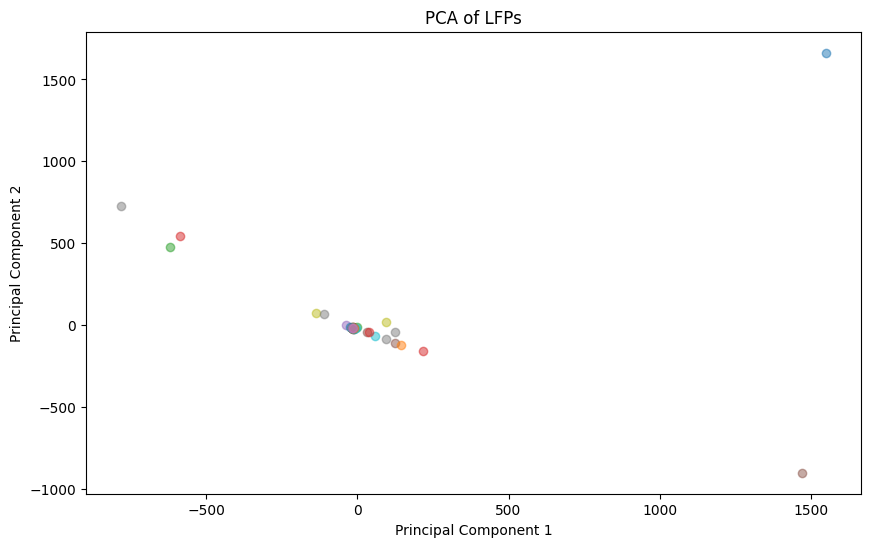

Outlier channels: [  0 125 127]


In [35]:
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


print(f"Number of channels: {filtered_lfps.shape[0]}")
# Create a PCA object
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(filtered_lfps)

# Get the transformed data
transformed_data = pca.transform(filtered_lfps)

# Plot the first two principal components, color by channel
plt.figure(figsize=(10, 6))
for i, channel_data in enumerate(transformed_data):
    plt.scatter(channel_data[0], channel_data[1], alpha=0.5, label=f'Channel {i+1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of LFPs')
# plt.legend()
plt.show()

from scipy.stats import zscore

# Calculate the Z-scores of the transformed data
z_scores = np.abs(zscore(transformed_data))

# Define the threshold for outliers
threshold = 3

# Find the channels that are outliers on either principal component
outlier_channels = np.where(np.any(z_scores > threshold, axis=1))

# Print out the outlier channels
print(f"Outlier channels: {outlier_channels[0]}")

### Run coherence analysis on all channels

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import coherence
from scipy.signal import welch  # To calculate power spectra if needed

In [9]:

import numpy as np
from scipy.signal import welch, csd
from numpy import angle, abs, exp, mean, sqrt

def calculate_all_measures(data, fs, nperseg=1024):
    n_channels = data.shape[0]
    n_frequencies = nperseg // 2 + 1
    magnitude_squared_coherence = np.zeros((n_channels, n_channels, n_frequencies))
    complex_coherence = np.zeros((n_channels, n_channels, n_frequencies), dtype=complex)
    plv = np.zeros((n_channels, n_channels, n_frequencies))

    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            f, Pxy = csd(data[i], data[j], fs=fs, nperseg=nperseg)
            f, Pxx = welch(data[i], fs=fs, nperseg=nperseg)
            f, Pyy = welch(data[j], fs=fs, nperseg=nperseg)

            # Calculate complex coherence
            Cxy = Pxy / sqrt(Pxx * Pyy)
            complex_coherence[i, j, :] = Cxy
            complex_coherence[j, i, :] = np.conj(Cxy)  # Coherence is conjugate symmetric

            # Calculate magnitude-squared coherence
            magnitude_squared_coherence[i, j, :] = abs(Cxy)**2
            magnitude_squared_coherence[j, i, :] = magnitude_squared_coherence[i, j, :]  # Symmetric

            # Calculate PLV
            plv[i, j, :] = abs(mean(exp(1j * angle(Cxy)), axis=0))
            plv[j, i, :] = plv[i, j, :]  # Symmetric

    return f, magnitude_squared_coherence, complex_coherence, plv


In [10]:
import numpy as np
from scipy.signal import welch, csd
from numpy import sqrt, angle, exp, mean
from multiprocessing import Pool
import os

def calculate_measures_for_channel_pair(i, j, data, fs, nperseg):
    # i, j, data, fs, nperseg = args
    # Calculate cross-spectral and power spectral densities
    f, Pxy = csd(data[i], data[j], fs=fs, nperseg=nperseg)
    _, Pxx = welch(data[i], fs=fs, nperseg=nperseg)
    _, Pyy = welch(data[j], fs=fs, nperseg=nperseg)

    # Filter frequencies up to 300 Hz
    valid_indices = f <= 300
    f_valid = f[valid_indices]
    Pxy_valid = Pxy[valid_indices]
    Pxx_valid = Pxx[valid_indices]
    Pyy_valid = Pyy[valid_indices]

    # Calculate complex coherence
    Cxy = Pxy_valid / sqrt(Pxx_valid * Pyy_valid)

    # Calculate magnitude-squared coherence
    magnitude_squared_coherence = abs(Cxy)**2

    # Calculate PLV
    plv = abs(mean(exp(1j * angle(Cxy)), axis=0))

    return i, j, f_valid, magnitude_squared_coherence, Cxy, plv
    

from joblib import Parallel, delayed

def calculate_all_measures(data, fs, nperseg=1024):
    n_channels = data.shape[0]
    # Initialize matrices to store results
    magnitude_squared_coherence = {}
    complex_coherence = {}
    plv = {}

    # Calculate measures for each pair of channels
    results = Parallel(n_jobs=-1)(delayed(calculate_measures_for_channel_pair)(i, j, data, fs, nperseg) for i in range(n_channels) for j in range(i + 1, n_channels))

    for i, j, f_valid, msc, cc, plv_value in results:
        # Store complex coherence
        if i not in complex_coherence:
            complex_coherence[i] = {}
        complex_coherence[i][j] = cc
        if j not in complex_coherence:
            complex_coherence[j] = {}
        complex_coherence[j][i] = np.conj(cc)  # Coherence is conjugate symmetric

        # Store magnitude-squared coherence
        if i not in magnitude_squared_coherence:
            magnitude_squared_coherence[i] = {}
        magnitude_squared_coherence[i][j] = msc
        if j not in magnitude_squared_coherence:
            magnitude_squared_coherence[j] = {}
        magnitude_squared_coherence[j][i] = msc

        # Store PLV
        if i not in plv:
            plv[i] = {}
        plv[i][j] = plv_value
        if j not in plv:
            plv[j] = {}
        plv[j][i] = plv_value

    return f_valid, magnitude_squared_coherence, complex_coherence, plv

In [11]:
f_valid, magnitude_squared_coherence, complex_coherence, plv = calculate_all_measures(filtered_signal, fs, 1024) # takes 32m
# frequencies, ms_coherence, complex_coherence, plv = calculate_all_measures(filtered_signal, fs) # this is the original one, took 112m

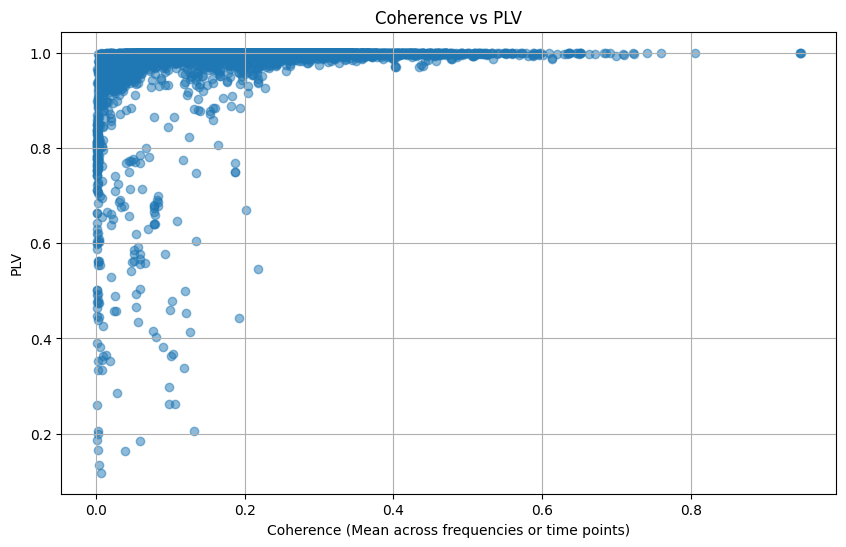

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n_channels = len(filtered_signal)
coherence_values = []
plv_values = []

for i in range(n_channels):
    for j in range(i + 1, n_channels):
        # Check for existing data and calculate the mean if it's an array
        if i in magnitude_squared_coherence and j in magnitude_squared_coherence[i]:
            # Assuming the data is an array, take the mean
            coherence_mean = np.mean(magnitude_squared_coherence[i][j])
            coherence_values.append(coherence_mean)
        else:
            coherence_values.append(np.nan)  # Handle missing data

        if i in plv and j in plv[i]:
            plv_values.append(plv[i][j])
        else:
            plv_values.append(np.nan)  # Handle missing data

# Convert to numpy arrays
coherence_values = np.array(coherence_values)
plv_values = np.array(plv_values)

# Remove entries where either value is NaN
valid_indices = ~np.isnan(coherence_values) & ~np.isnan(plv_values)
coherence_values = coherence_values[valid_indices]
plv_values = plv_values[valid_indices]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(coherence_values, plv_values, alpha=0.5)
plt.xlabel('Coherence (Mean across frequencies or time points)')
plt.ylabel('PLV')
plt.title('Coherence vs PLV')
plt.grid(True)
plt.show()



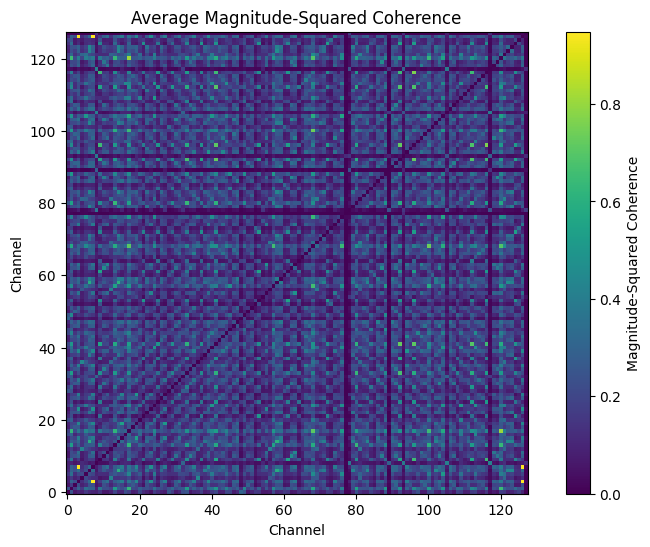

Channels with the highest coherence: [(3, 7), (7, 3)]
Coherence values: [0.948590657601333, 0.948590657601333]


In [13]:
# plot average coherence in 128x128 grid:
# Calculate the average magnitude-squared coherence across all channel pairs
n_channels = len(filtered_signal)

# Initialize the average magnitude-squared coherence matrix
avg_magnitude_squared_coherence = np.zeros((n_channels, n_channels))

# Calculate the average magnitude-squared coherence
for i in range(n_channels):
    for j in range(i + 1, n_channels):
        avg_magnitude_squared_coherence[i, j] = np.mean(magnitude_squared_coherence[i][j])
        avg_magnitude_squared_coherence[j, i] = avg_magnitude_squared_coherence[i, j]  # Coherence is symmetric
        
# Plot the average magnitude-squared coherence
plt.figure(figsize=(10, 6))
plt.imshow(avg_magnitude_squared_coherence, cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude-Squared Coherence')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.title('Average Magnitude-Squared Coherence')
plt.show()

# print channels with greatest coherence
# Find the channels with the highest average magnitude-squared coherence
max_coherence = np.max(avg_magnitude_squared_coherence)
max_coherence_indices = np.where(avg_magnitude_squared_coherence == max_coherence)
max_coherence_channels = list(zip(max_coherence_indices[0], max_coherence_indices[1]))

# Print the channels with the highest coherence
print(f"Channels with the highest coherence: {max_coherence_channels}")
# print their coherence values
max_coherence_values = [avg_magnitude_squared_coherence[i, j] for i, j in max_coherence_channels]
print(f"Coherence values: {max_coherence_values}")

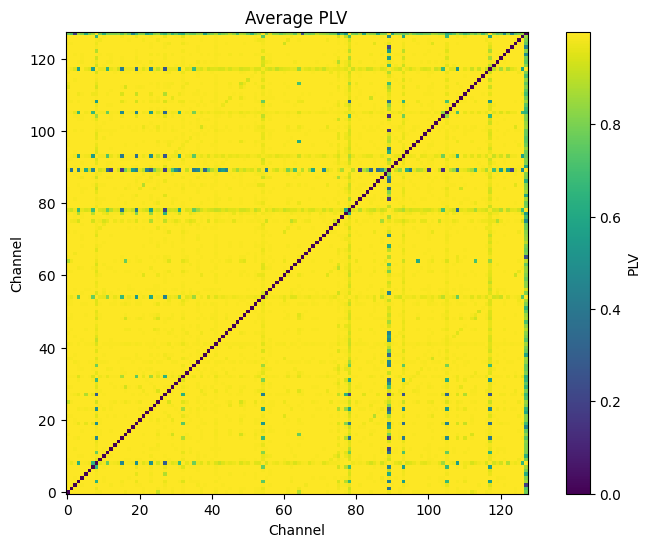

In [14]:
# Calculate the average PLV across all channel pairs using the plv matrix
n_channels = len(filtered_signal)

# Initialize the average PLV matrix
avg_plv = np.zeros((n_channels, n_channels))

# Calculate the average PLV
for i in range(n_channels):
    for j in range(i + 1, n_channels):
        avg_plv[i, j] = np.mean(plv[i][j])
        avg_plv[j, i] = plv[i][j]  # Coherence is symmetric
        
# Plot the average PLV
plt.figure(figsize=(10, 6))
plt.imshow(avg_plv, cmap='viridis', origin='lower')
plt.colorbar(label='PLV')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.title('Average PLV')
plt.show()

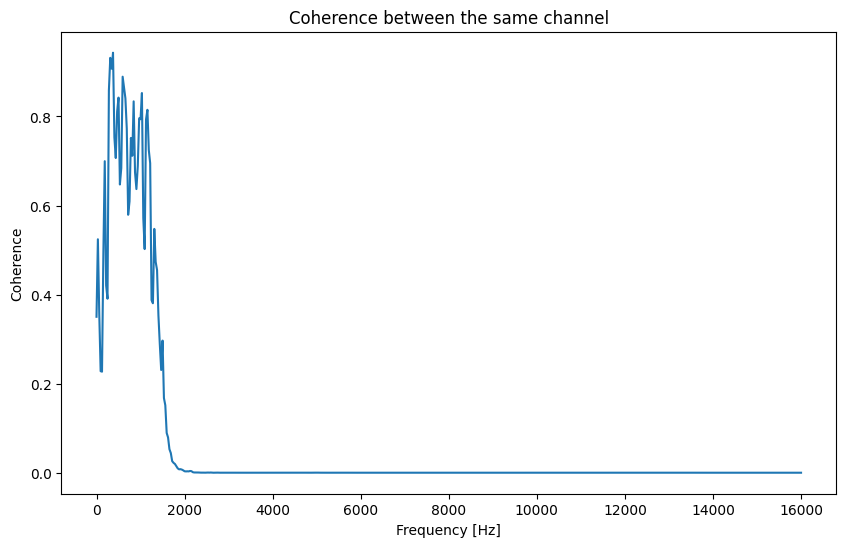

In [15]:
# compute coherence between the same channel:
# f, Cxy = coherence(filtered_signal[0], filtered_signal[1], fs=fs, nperseg=1024)
# plt.figure(figsize=(10, 6))
# plt.plot(f, Cxy)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Coherence')
# # plt.title('Coherence between the same channel')
# plt.show()

### load spike data from mat file

In [64]:
# load spike_data mat file:
spikemat = r"f:\EnclosureProjects\inprep\freemat\ephys_tests\240424_mat2_spikesLFPs\hedy_1to7khz\nex5\Neural_data_nex5.mat"

# load mat file:
import scipy.io
mat = scipy.io.loadmat(spikemat)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'SpikeData', 'Unit_rasters', 'neural_dir'])

In [65]:
# show how many neurons there are per channel using SpikeData:
spikes = mat['SpikeData']

for i in range(len(spikes[0][0])):
    print(f"Channel {i+1} has {len(spikes[0][0][i])} neurons")

Channel 1 has 1 neurons
Channel 2 has 1 neurons
Channel 3 has 1 neurons
Channel 4 has 1 neurons
Channel 5 has 1 neurons
Channel 6 has 1 neurons
Channel 7 has 1 neurons
Channel 8 has 1 neurons
Channel 9 has 1 neurons
Channel 10 has 1 neurons
Channel 11 has 1 neurons
Channel 12 has 1 neurons
Channel 13 has 1 neurons
Channel 14 has 1 neurons
Channel 15 has 1 neurons
Channel 16 has 1 neurons
Channel 17 has 1 neurons
Channel 18 has 1 neurons
Channel 19 has 1 neurons
Channel 20 has 1 neurons
Channel 21 has 1 neurons
Channel 22 has 1 neurons
Channel 23 has 1 neurons
Channel 24 has 1 neurons
Channel 25 has 1 neurons
Channel 26 has 1 neurons
Channel 27 has 1 neurons
Channel 28 has 1 neurons
Channel 29 has 1 neurons
Channel 30 has 1 neurons
Channel 31 has 1 neurons
Channel 32 has 1 neurons
Channel 33 has 1 neurons
Channel 34 has 1 neurons
Channel 35 has 1 neurons
Channel 36 has 1 neurons
Channel 37 has 1 neurons
Channel 38 has 1 neurons
Channel 39 has 1 neurons
Channel 40 has 1 neurons
Channel 4

In [57]:
# len(mat['Unit_rasters'][10]) # equals duration of session in seconds
# mat['Unit_rasters']

array([[  1,   0,   2, ...,   4,   5,   1],
       [  1,   1,   0, ...,   1,   0,   1],
       [  3,   1,   7, ...,  11,  14,   2],
       ...,
       [  2,   1,   7, ...,   8,   7,   2],
       [ 36,  87,  73, ..., 112,  72,  36],
       [  3,   5,   2, ...,   9,  15,   2]], dtype=uint16)

In [66]:
unit_rasters = mat['Unit_rasters']
unit_rasters.shape

(135, 250)

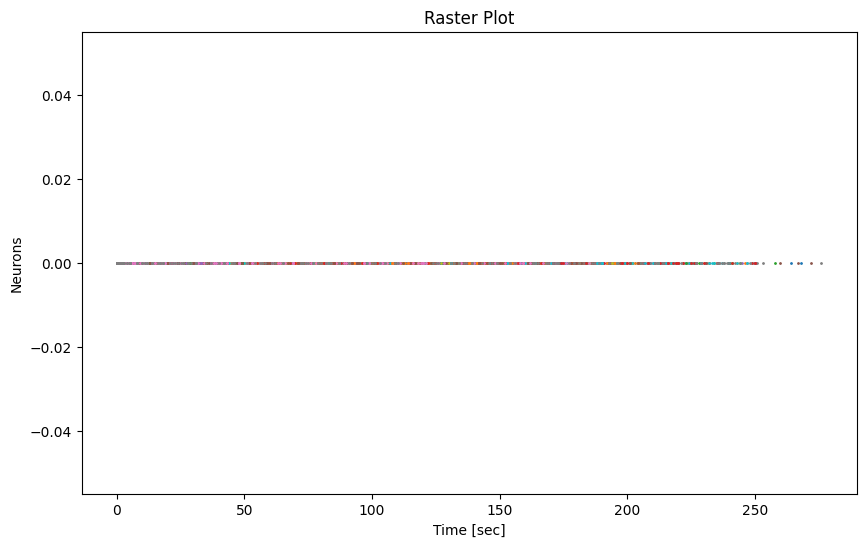

In [55]:
#

# plot raster plot for all channels:
import matplotlib.pyplot as plt
import numpy as np 

# Assuming mat is an instance of mat file

        
plt.xlabel('Time [sec]')
plt.ylabel('Neurons')
plt.title('Raster Plot')
plt.show()


### load spike data from nex file

In [61]:
# Load spike data: 
spike_data = reader.ReadNexFile(r"f:\EnclosureProjects\inprep\freemat\ephys_tests\240424_mat2_spikesLFPs\hedy_1to7khz\nex5\spikedata\sorted\Chan_1-30edy_1to7khz_v2_sorted_ToExtract.nex")

In [62]:
spikes = [neuron.Timestamps for neuron in spike_data.Neurons]

In [63]:
len(spike_data.Neurons)

60

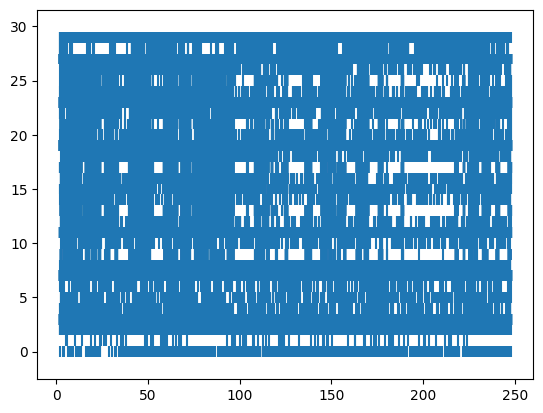

In [28]:
plt.eventplot(spike_data)
plt.show() 